# Model Training
## Import Data and Required Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


## Import the data

In [3]:
df = pd.read_csv('data/cleaned_data.csv')

In [4]:
df.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka,Location
0,3,3,1,1705,dhaka,16900000,Kalabagan
1,3,3,6,1370,dhaka,12500000,Dhanmondi
2,3,3,3,1150,dhaka,8800000,Badda
3,3,3,8,1397,dhaka,8000000,Demra
4,3,3,3,1300,dhaka,8000000,Shyampur


## Preparing X and Y variables

In [5]:
X = df.drop(columns=['Price_in_taka'], axis=1)

In [6]:
X.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Location
0,3,3,1,1705,dhaka,Kalabagan
1,3,3,6,1370,dhaka,Dhanmondi
2,3,3,3,1150,dhaka,Badda
3,3,3,8,1397,dhaka,Demra
4,3,3,3,1300,dhaka,Shyampur


In [7]:
y = df['Price_in_taka']

In [8]:
y

0       16900000
1       12500000
2        8800000
3        8000000
4        8000000
          ...   
1757     3220000
1758     3220000
1759     4740000
1760     4500000
1761     4960000
Name: Price_in_taka, Length: 1762, dtype: int64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(sparse_output=False)

preprocessor = ColumnTransformer(
    [
        ("OneHotEncode", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1762, 95)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape

((1409, 95), (353, 95))

## Create an Evaluate Function to give all metrics after model Training

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1579515.5725
- Mean Absolute Error: 1045810.3662
- R2 Score: 0.7360
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 108431995084874032.0000
- Mean Absolute Error: 8750187884720746.0000
- R2 Score: -1374242470917708447744.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1579511.7892
- Mean Absolute Error: 1045497.7486
- R2 Score: 0.7360
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1666268.2927
- Mean Absolute Error: 1135378.4725
- R2 Score: 0.6755


Ridge
Model performance for Training set
- Root Mean Squared Error: 1603353.5924
- Mean Absolute Error: 1074127.9051
- R2 Score: 0.7280
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1640045.7277
- Mean Absolute Error: 1143984.0128
- R2 Score: 0.6856




e:\My Project\End-to-end-House-Price-Prediction-Project-with-Deployment\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.555e+15, tolerance: 1.332e+12
  model = cd_fast.enet_coordinate_descent(


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1423000.7507
- Mean Absolute Error: 960321.3485
- R2 Score: 0.7857
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1708124.2559
- Mean Absolute Error: 1138643.6884
- R2 Score: 0.6590


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 366490.5067
- Mean Absolute Error: 102950.3472
- R2 Score: 0.9858
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2041748.4905
- Mean Absolute Error: 1237233.9335
- R2 Score: 0.5127


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 727711.1567
- Mean Absolute Error: 460169.3018
- R2 Score: 0.9440
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1566204.7746
- Mean Absolute Error: 1015807.3689
- R2 Score: 0.7133


XGBRegressor
Model performance for Training set
- Root Mean Square

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,7.417470e-01
6,XGBRegressor,7.165814e-01
5,Random Forest Regressor,7.132882e-01
2,Ridge,6.856160e-01
1,Lasso,6.754823e-01
3,K-Neighbors Regressor,6.589741e-01
4,Decision Tree,5.127488e-01
8,AdaBoost Regressor,4.334755e-01
0,Linear Regression,-1.374242e+21


## CatBoost Regression Model 

In [17]:
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# Predictions
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

0:	learn: 2907323.9654299	test: 2775455.5677838	best: 2775455.5677838 (0)	total: 2.02ms	remaining: 2.02s
100:	learn: 1485938.8926037	test: 1587008.9977513	best: 1587008.9977513 (100)	total: 221ms	remaining: 1.97s
200:	learn: 1313065.0790697	test: 1535151.0416736	best: 1535151.0416736 (200)	total: 415ms	remaining: 1.65s
300:	learn: 1201783.1233350	test: 1513785.9354779	best: 1513594.4561209 (297)	total: 626ms	remaining: 1.45s
400:	learn: 1107726.4337907	test: 1495241.9017392	best: 1494848.5911104 (395)	total: 807ms	remaining: 1.21s
500:	learn: 1042475.2928264	test: 1492089.8681318	best: 1490048.0874750 (486)	total: 996ms	remaining: 992ms
600:	learn: 986369.2945158	test: 1485376.7998517	best: 1485376.7998517 (600)	total: 1.2s	remaining: 796ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1485376.8
bestIteration = 600

Shrink model to first 601 iterations.
 Accuracy of the model is 74.21


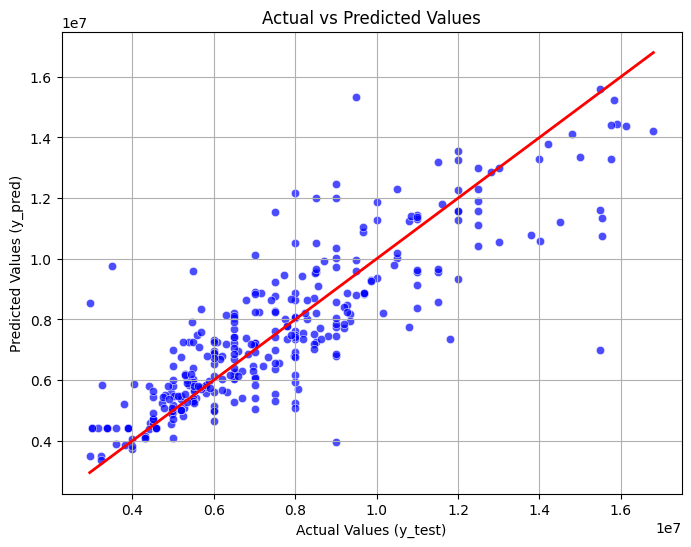

In [18]:
# Scatter plot for y_pred vs y_test
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)  # Line of perfect prediction
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.grid()
plt.show()

## Difference between Actual and Predicted Values

In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
968,5500000,6.038748e+06,-5.387485e+05
212,6500000,6.074263e+06,4.257369e+05
416,4950000,4.544627e+06,4.053734e+05
677,6850000,6.870526e+06,-2.052636e+04
1737,9000000,3.953822e+06,5.046178e+06
...,...,...,...
535,7000000,8.853298e+06,-1.853298e+06
948,5683200,7.569420e+06,-1.886220e+06
940,6000000,6.121315e+06,-1.213149e+05
1684,2950000,3.508746e+06,-5.587456e+05
